In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn import linear_model
import seaborn as sb

In [3]:
hs=pd.read_csv("datasets/area-vs-price.csv")

In [173]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area-sqft  499 non-null    int64
 1   price      499 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB


In [174]:
hs.describe()

,Area-sqft,price
count,499.000000,4.990000e+02
mean,1124.250501,2.000249e+06
std,72.097013,1.441932e+02
min,1000.000000,2.000000e+06
25%,1062.000000,2.000124e+06
50%,1124.000000,2.000249e+06
75%,1186.500000,2.000374e+06
max,1249.000000,2.000498e+06


In [175]:
hs.head(10)

,Area-sqft,price
0,1000,2000000
1,1000,2000001
2,1001,2000002
3,1001,2000003
4,1002,2000004
5,1002,2000005
6,1003,2000006
7,1003,2000007
8,1004,2000008
9,1004,2000009


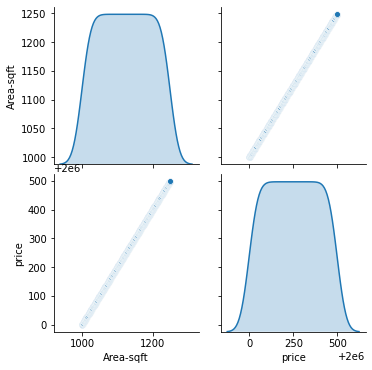

In [203]:
sb.pairplot(hs,diag_kind = "kde")

In [177]:
dt=hs.dropna()
len(dt)

499

In [178]:
X = np.array(dt["Area-sqft"]).reshape((-1, 1))
y = dt["price"]

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [195]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [196]:
regressor.intercept_

1998000.5840070501

In [197]:
regressor.coef_

array([1.99993529])

In [198]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
90,2000090,2.000091e+06
254,2000254,2.000255e+06
283,2000283,2.000283e+06
444,2000444,2.000445e+06
474,2000474,2.000475e+06
15,2000015,2.000015e+06
316,2000316,2.000317e+06
488,2000488,2.000489e+06
159,2000159,2.000159e+06
153,2000153,2.000153e+06


In [199]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5012263708561658
Mean Squared Error: 0.25136988574479535
Root Mean Squared Error: 0.5013680142817204


In [200]:
predict = regressor.predict([[2011]])
predict

array([2002022.45387639])

Text(0, 0.5, 'price')

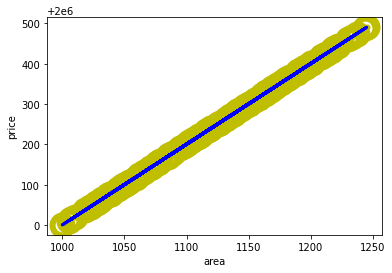

In [201]:
plot.scatter(X_test, y_test,  color='y',linewidths=20)
plot.plot(X_test, y_pred, color='blue', linewidth=3)
plot.xlabel("area")
plot.ylabel("price")